In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed May  7 11:38:36 2025

@author: Frej
"""

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy.integrate as integrate


def envelope (time): #sawtooth
    return np.sin(time)#1 - np.abs(2*(time - np.floor(time + 0.5)))


def saw_envelope (time): #sawtooth
    time = time / 2/np.pi
    return 1 - np.abs(2*(time - np.floor(time + 0.5)))

#squarewave
def square_envelope(time): #sawtooth
    return (np.sign(np.sin(time)) + 1)/2


class M:
    def __init__(self,Nc,eps,phi,wl,I,E0,res):
        self.T = Nc*2*np.pi/wl
        self.A0 = np.sqrt(I)/wl
        
        self.eps = eps
        self.wl = wl
        self.phi = phi
        self.E0 = E0
        
        #Fields and times
        self.ts = np.linspace(0,self.T,num=res)
        vector = np.asarray([self.ts*0,self.eps*np.sin(self.wl*self.ts+self.phi),np.cos(self.wl*self.ts+self.phi)])
        
        self.As = square_envelope(np.pi*self.ts/self.T)**2 *self.A0/((1+self.eps**2)**(1/2))*vector

    
    #Defining Exponential
    def plotAs(self):
        fig, ax = plt.subplots()
        ax.plot(self.ts,square_envelope(np.pi*self.ts/self.T)**2)
        for i in range(3):
            ax.plot(self.ts,self.As[i,:],label=f'As{i}')
        ax.legend()
        ax.set_xlabel('t')
        ax.set_ylabel('As')
        plt.show()

    def get_As(self):
        return self.As
    def exp_integrand(self,k):
        return [1j * (1/2) * ((k+A) @ (k+A)) for A in self.As.T]   
    def exp_integral(self,k):
        exp_ys = self.exp_integrand(k)
        return np.e**(integrate.cumulative_trapezoid(exp_ys,self.ts,initial=0)-1j * self.E0*self.ts)
    #Defining Integral
    def integrands(self,k):
        return self.As * self.exp_integral(k)
    def integral(self,k):
        ys = self.integrands(k)
        return k @ integrate.cumulative_trapezoid(ys,self.ts,initial=0)

    
    #Defining multiplication with fourier transform
    def f_phi_0(self,k):
        k_mag = np.linalg.norm(k)
        return 2*2**(1/2)/np.pi*(1/(k_mag**2+1)**2)
    def Mk0(self,k):
        return 1j*self.f_phi_0(k)*self.integral(k)
    def Mk0_squared(self,k):
        Mk0_squared = np.real(np.vdot(self.Mk0(k),self.Mk0(k)))
        return Mk0_squared

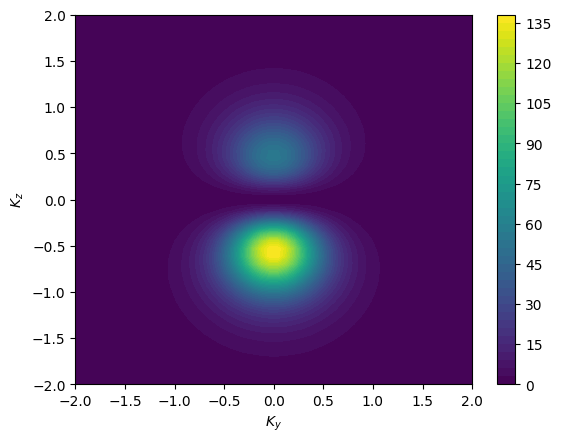

In [205]:

#Field parameters
Nc = 4 #Field revolutions in envelope
eps = 0 #(-1,0,1), Polarization of light
phi = 0#np.pi /2 #Phase difference between envelope and field
#all values in au
wl = 0.057 #800nm wavelength
I = 0.001 #I=10^14 w/cm^2  
E0 = -0.500 #13.6 eV
res = 1000

M1 = M(Nc,eps,phi,wl,I,E0,res)

#Trial calculation for k along the z-axis

#kxs = np.linspace(-2,2,num=50)
kys = np.linspace(-2,2,num=50)
kzs = np.linspace(-2,2,num=50)

a = np.empty(shape=(len(kys),len(kzs)))
for j in range(0,len(kys)):
    for k in range(0,len(kzs)):
        a[k][j]=M1.Mk0_squared([0,kys[j],kzs[k]])
        #
        #print(a[k][j])

# Simple plot
plt.contourf(kys, kzs, a,50)
plt.xlabel(r'$K_y$')
plt.ylabel(r'$K_z$')
plt.colorbar()

In [206]:
kys = np.linspace(-2,2,num=50)
kzs = np.linspace(-2,2,num=50)

Nc_list = [10,20]
for Nc in Nc_list:
    break
    M1 = M(Nc,eps,phi,wl,I,E0,res)
    a = np.empty(shape=(len(kys),len(kzs)))

    for j in range(0,len(kys)):
        for k in range(0,len(kzs)):
            a[k][j]=M1.Mk0_squared([0,kys[j],kzs[k]])
            #print(a[k][j])

    # Simple plot
    plt.contourf(kys, kzs, a,50)
    plt.xlabel(r'$K_y$')
    plt.ylabel(r'$K_z$')
    plt.colorbar()
    plt.title("$N_C$ = " + str(Nc))
    plt.savefig("/Users/klonk/Downloads/250513_Ultra_Plots/name" + str(Nc))
    plt.clf()

## compare A and slice of k

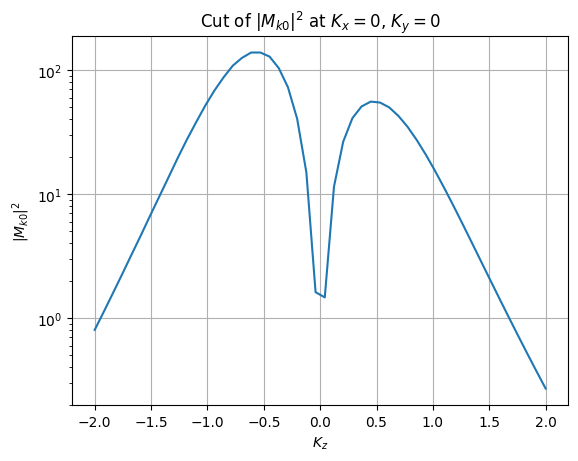

In [207]:
# Define kz values
kzs = np.linspace(-2, 2, num=50)

# Initialize an array to store results
Mk0_squared_values = []

# Calculate M1.Mk0_squared for kx = 0, ky = 0, and varying kz
for kz in kzs:
    Mk0_squared_values.append(M1.Mk0_squared([0, 0, kz]))

# Plot the results
plt.yscale('log')
plt.plot(kzs, Mk0_squared_values)
plt.xlabel(r'$K_z$')
plt.ylabel(r'$|M_{k0}|^2$')
plt.title(r'Cut of $|M_{k0}|^2$ at $K_x = 0$, $K_y = 0$')
plt.grid()
plt.show()

In [208]:
As = M1.get_As()

Text(0, 0.5, 'amplitude')

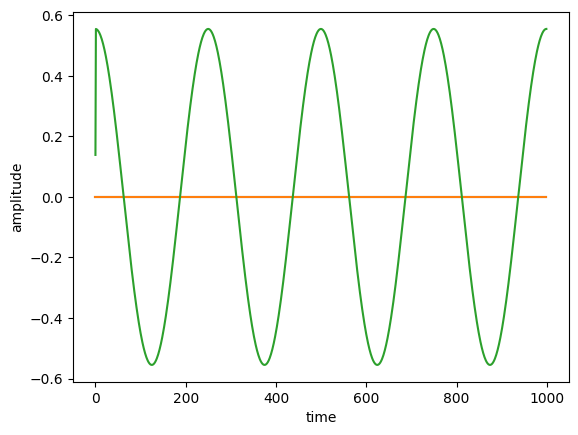

In [209]:
plt.plot(As[0,:])
plt.plot(As[1,:])
plt.plot(As[2,:])
plt.xlabel("time")
plt.ylabel("amplitude")

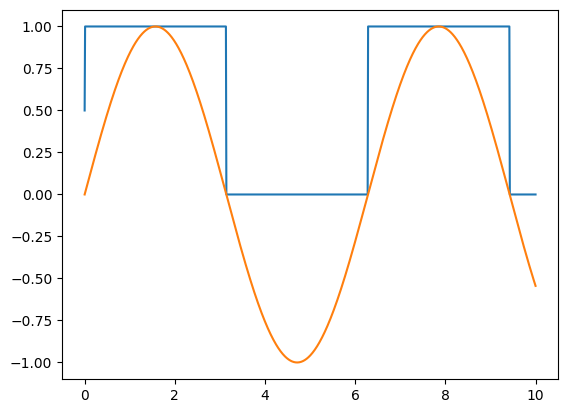

In [210]:
times_test = np.linspace(0,10,1000)
plt.plot(times_test,square_envelope(times_test))
plt.plot(times_test,envelope(times_test))

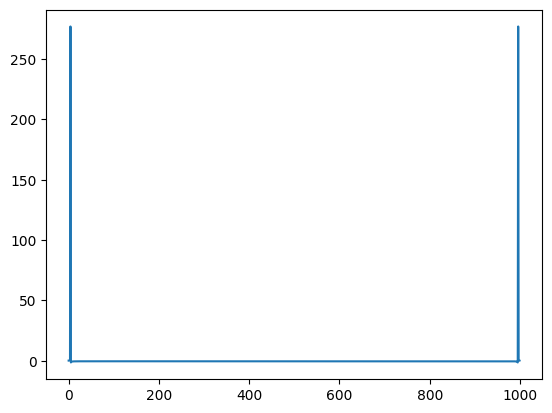

In [211]:
f_result = np.fft.fft(As[2,:])
plt.plot(f_result)


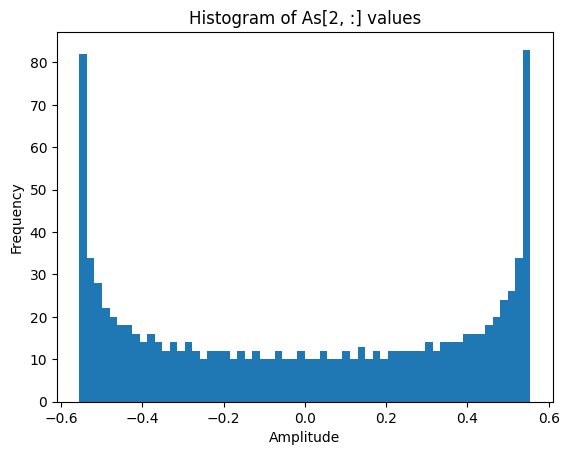

In [212]:
import matplotlib.pyplot as plt

plt.hist(As[2, :], bins=60)  # You can adjust the number of bins
plt.xlabel("Amplitude")
plt.ylabel("Frequency")
plt.title("Histogram of As[2, :] values")
plt.show()
